In [1]:
import os

In [2]:
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')
    print(os.getcwd())

/home/arghyadeep99/Desktop/BE Project/Atari-Transfer-Learning


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import yaml

In [4]:
style.use('seaborn-poster')

In [5]:
!ls

agent.py      LICENSE  main.py	  __pycache__  requirements.txt
estimator.py  logs     notebooks  README.md    utils.py


In [6]:
import datetime as dt

def get_total_hours(stringHMS):
    timedeltaObj = dt.datetime.strptime(stringHMS, "%Hh %Mm %Ss") - dt.datetime(1900,1,1)
    return (timedeltaObj.total_seconds())/3600

In [7]:
def parse_logs(name):
    file = os.path.join('logs/Logs&models', name, 'train.log')
    with open(file, 'r') as f:
        logs = f.read()
    episodes = []
    epsilon = []
    network_updates = []
    mean_rewards = []
    mean_lengths = []
    times = []
    for line in logs.split('\n')[:-1]:
        datum = line.split(', ')
        time = get_total_hours(datum[0].split(':')[1].strip())
        episode = int(datum[0].split(':')[1])
        eps = float(datum[1].split(':')[1])
        nu = int(datum[2].split(':')[1])
        emr = float(datum[3].split(':')[1])
        eml = float(datum[4].split(':')[1])
        episodes.append(episode)
        epsilon.append(eps)
        network_updates.append(nu)
        mean_rewards.append(emr)
        mean_lengths.append(eml)
        times.append(time)
        
    return episodes, epsilon, network_updates, mean_rewards, mean_lengths, times

In [19]:
name1 = 'pong8k'
name2 = 'pongTransf8k'

In [20]:
episodes, epsilon, network_updates, mean_rewards, mean_lengths, times = parse_logs(name2)
episodes1, epsilon1, network_updates1, mean_rewards1, mean_lengths1, times1 = parse_logs(name1)
episodes2, epsilon2, network_updates2, mean_rewards2, mean_lengths2, times2 = parse_logs(name2)

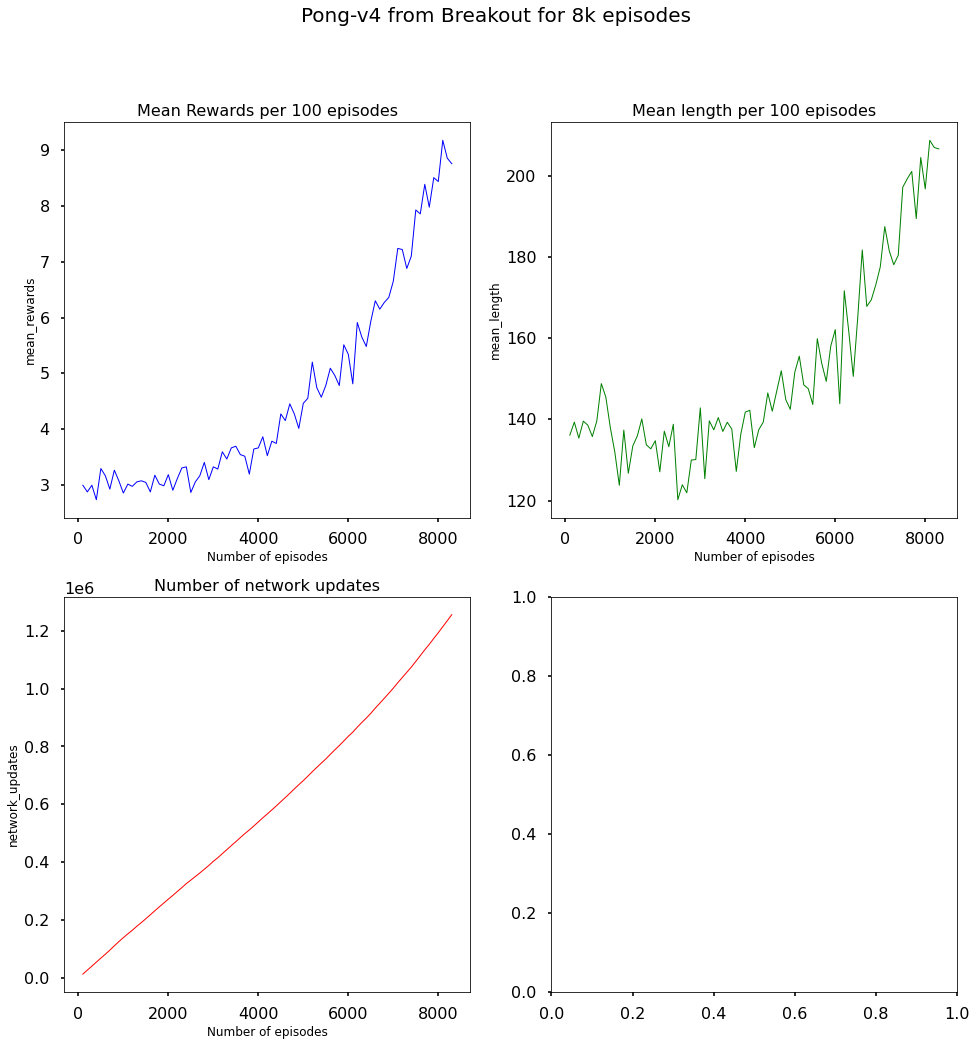

In [129]:
fig, ax = plt.subplots(2, 2, figsize=(16,16))
ax[0][0].plot(episodes, mean_rewards, color='blue', lw=1)
ax[0][0].set_title('Mean Rewards per 100 episodes', fontsize=16)
ax[0][0].set_xlabel('Number of episodes', fontsize=12)
ax[0][0].set_ylabel('mean_rewards', fontsize=12)

ax[0][1].plot(episodes, mean_lengths, color='green', lw=1)
ax[0][1].set_title('Mean length per 100 episodes', fontsize=16)
ax[0][1].set_xlabel('Number of episodes', fontsize=12)
ax[0][1].set_ylabel('mean_length', fontsize=12)

ax[1][0].plot(episodes, network_updates, color='red', lw=1)
ax[1][0].set_title('Number of network updates', fontsize=16)
ax[1][0].set_xlabel('Number of episodes', fontsize=12)
ax[1][0].set_ylabel('network_updates', fontsize=12)

'''
ax[1][1].plot(episodes, times, color='violet', lw=1)
ax[1][1].set_title('Time to train per 100 episodes', fontsize=16)
ax[1][1].set_xlabel('Number of episodes', fontsize=12)
ax[1][1].set_ylabel('time_to_train', fontsize=12)
'''

#plt.tight_layout()
plt.suptitle('SpaceInvaders-v4 from Breakout for 8k episodes', fontsize=20)
fig.savefig(f'./plots/pong-from-breakout-8k.png')
plt.show()

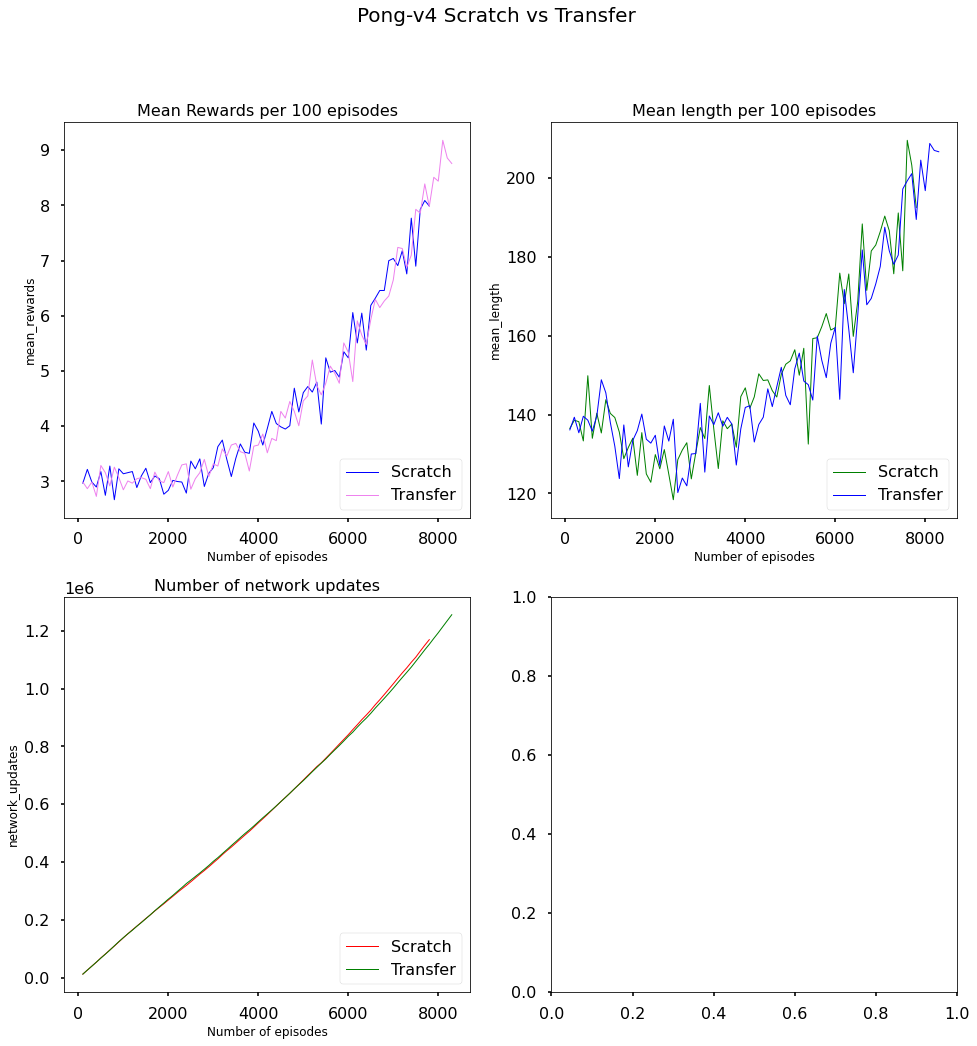

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(16,16))
ax[0][0].plot(episodes1, mean_rewards1, color='blue', lw=1, label='Scratch')
ax[0][0].plot(episodes2, mean_rewards2, color='violet', lw=1, label='Transfer')
ax[0][0].set_title('Mean Rewards per 100 episodes', fontsize=16)
ax[0][0].set_xlabel('Number of episodes', fontsize=12)
ax[0][0].set_ylabel('mean_rewards', fontsize=12)
ax[0][0].legend(loc='lower right');

ax[0][1].plot(episodes1, mean_lengths1, color='green', lw=1, label='Scratch')
ax[0][1].plot(episodes2, mean_lengths2, color='blue', lw=1, label='Transfer')
ax[0][1].set_title('Mean length per 100 episodes', fontsize=16)
ax[0][1].set_xlabel('Number of episodes', fontsize=12)
ax[0][1].set_ylabel('mean_length', fontsize=12)
ax[0][1].legend(loc='lower right');

ax[1][0].plot(episodes1, network_updates1, color='red', lw=1, label='Scratch')
ax[1][0].plot(episodes2, network_updates2, color='green', lw=1, label='Transfer')
ax[1][0].set_title('Number of network updates', fontsize=16)
ax[1][0].set_xlabel('Number of episodes', fontsize=12)
ax[1][0].set_ylabel('network_updates', fontsize=12)
ax[1][0].legend(loc='lower right');
'''
ax[1][1].plot(episodes1, times1, color='violet', lw=1, label='Freeze-2')
ax[1][1].plot(episodes2, times2, color='red', lw=1, label='Freeze-0')
ax[1][1].set_title('Time to train per 100 episodes', fontsize=16)
ax[1][1].set_xlabel('Number of episodes', fontsize=12)
ax[1][1].set_ylabel('time_to_train', fontsize=12)
ax[1][1].legend(loc='lower right');
'''

#plt.tight_layout()
plt.suptitle('Pong-v4 Scratch vs Transfer', fontsize=20)
fig.savefig(f'./plots/pong-compare-8k.png')
plt.show()